In [66]:
import pandas as pd
import numpy as np
from glob import glob
import warnings
import matplotlib.pyplot as plt
import rasterio as rio
import xarray as xr
import rioxarray as rxr
import sys
sys.path.append('src')
from src.non_snow_retrievals import vegetation_phase
from src.swe_retrievals import calc_soil_moisture_error

warnings.simplefilter('ignore', FutureWarning)

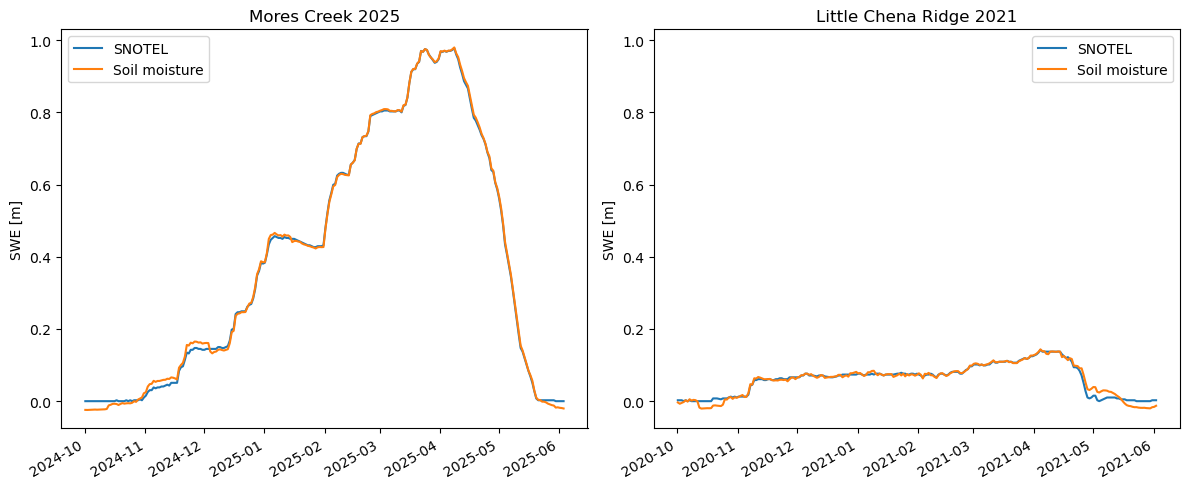

In [ ]:
mores = pd.read_csv('../data_sandbox/swe_errors/snotel/hourly/637_ALL_WATERYEAR=2025.csv', header=1, 
                    parse_dates=[[1,2]], na_values=['-99.9']).rename(columns={'WTEQ.I-1 (in) ':'swe','SMS.I-1:-2 (pct)  (silt)':'sm_2cm'})
mores.index = mores['Date_Time']
mores.drop(columns=['Site Id','Date_Time'], inplace=True)
mores = mores[mores.index.hour==6]
mores['swe'] *= 0.0254

chena = pd.read_csv('../data_sandbox/swe_errors/snotel/hourly/947_ALL_WATERYEAR=2021.csv', header=1, 
                    parse_dates=[[1,2]], na_values=['-99.9']).rename(columns={'WTEQ.I-1 (in) ':'swe','SMS.I-1:-2 (pct) ':'sm_2cm'})
chena.index = chena['Date_Time']
chena.drop(columns=['Site Id','Date_Time'], inplace=True)
chena['swe'] *= 0.0254
chena = chena.loc[:'2021-06-02']
chena = chena[chena.index.hour==6]

# Soil moisture
mores_sand = 45.1
mores_clay = 14.4
mores['soil_error'] = calc_soil_moisture_error(mores_sand, mores_clay, mores['sm_2cm']/100) + mores['swe']

chena_sand = 31.2
chena_clay = 11.8
chena['soil_error'] = calc_soil_moisture_error(chena_sand, chena_clay, chena['sm_2cm']/100) + chena['swe']


# Vegetation permittivity
mores_veg_height = 



fig, ax = plt.subplots(1, 2, figsize=(11,5))
mores['swe'].plot(ax=ax[0], label='SNOTEL')
mores['soil_error'].plot(ax=ax[0], label='Soil moisture')
ax[0].set_title('Mores Creek 2025')
ax[0].set_xlabel('')
ax[0].set_ylabel('SWE [m]')
ax[0].legend()

chena['swe'].plot(ax=ax[1], label='SNOTEL')
chena['soil_error'].plot(ax=ax[1], label='Soil moisture')
ax[1].set_title('Little Chena Ridge 2021')
ax[1].set_xlabel('')
ax[1].set_ylabel('SWE [m]')
ax[1].set_ylim(ax[0].get_ylim())
ax[1].legend()

plt.tight_layout()


# for axx in ax.flatten():
#     axx.set_ylim([-0.02, 1.02])

In [13]:
mores.index.hour

Index([6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       ...
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype='int32', name='Date_Time', length=246)

In [39]:
mores_files = sorted(glob('../data_sandbox/swe_errors/snotel/hourly/637*.csv'))
mores = pd.read_csv(mores_files[0], header=1, parse_dates=[[1,2]], na_values=['-99.9']).rename(columns={'WTEQ.I-1 (in) ':'swe','SMS.I-1:-2 (pct)  (silt)':'sm_2cm'})
mores.index = mores['Date_Time']
mores.drop(columns=['Date_Time', 'Site Id'], inplace=True)

for f in mores_files[1:]:
    df_tmp = pd.read_csv(f, header=1, parse_dates=[[1,2]], na_values=['-99.9']).rename(columns={'WTEQ.I-1 (in) ':'swe','SMS.I-1:-2 (pct)  (silt)':'sm_2cm'})
    df_tmp.index = df_tmp['Date_Time']
    df_tmp.drop(columns=['Date_Time', 'Site Id'], inplace=True)
    mores = pd.concat([mores, df_tmp])

mores['WaterYear'] = [i.year + 1 if i.month in [10,11,12] else i.year for i in mores.index]
mores = mores[[c for c in mores.columns if 'Unnamed' not in c]]


chena_files = sorted(glob('../data_sandbox/swe_errors/snotel/hourly/947*.csv'))
chena = pd.read_csv(chena_files[0], header=1, parse_dates=[[1,2]], na_values=['-99.9']).rename(columns={'WTEQ.I-1 (in) ':'swe','SMS.I-1:-2 (pct) ':'sm_2cm'})
chena.index = chena['Date_Time']
chena.drop(columns=['Date_Time', 'Site Id'], inplace=True)

for f in chena_files[1:]:
    df_tmp = pd.read_csv(f, header=1, parse_dates=[[1,2]], na_values=['-99.9']).rename(columns={'WTEQ.I-1 (in) ':'swe','SMS.I-1:-2 (pct) ':'sm_2cm'})
    df_tmp.index = df_tmp['Date_Time']
    df_tmp.drop(columns=['Date_Time', 'Site Id'], inplace=True)
    chena = pd.concat([chena, df_tmp])

chena['WaterYear'] = [i.year + 1 if i.month in [10,11,12] else i.year for i in chena.index]
chena = chena[[c for c in chena.columns if 'Unnamed' not in c]]



for df in [mores, chena]:
    df['dowy'] = [(r[0] - pd.to_datetime(f'{int(r[1]["WaterYear"])-1}-10-01')) for r in df.iterrows()] # type: ignore
    df['dowy'] = df['dowy'].dt.days + 1

    
    


/Users/ropa5718/github/SWE_error_analysis/src/non_snow_retrievals.py:100: RuntimeWarning: invalid value encountered in scalar divide
  return 1/(2*1j * kz1 - 2* 1j * np.conj(kz2))
/var/folders/qw/0hrz2r9d1hgffvdv588xr_9r0000gp/T/ipykernel_50637/2939090557.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mores_6am['soil_error'] = calc_soil_moisture_error(mores_sand, mores_clay, mores_6am['sm_2cm']/100)
/Users/ropa5718/github/SWE_error_analysis/src/non_snow_retrievals.py:100: RuntimeWarning: invalid value encountered in scalar divide
  return 1/(2*1j * kz1 - 2* 1j * np.conj(kz2))
/var/folders/qw/0hrz2r9d1hgffvdv588xr_9r0000gp/T/ipykernel_50637/2939090557.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

[Text(1, 0, 'Oct'),
 Text(32, 0, 'Nov'),
 Text(62, 0, 'Dec'),
 Text(93, 0, 'Jan'),
 Text(124, 0, 'Feb'),
 Text(152, 0, 'Mar'),
 Text(183, 0, 'Apr'),
 Text(213, 0, 'May'),
 Text(244, 0, 'Jun')]

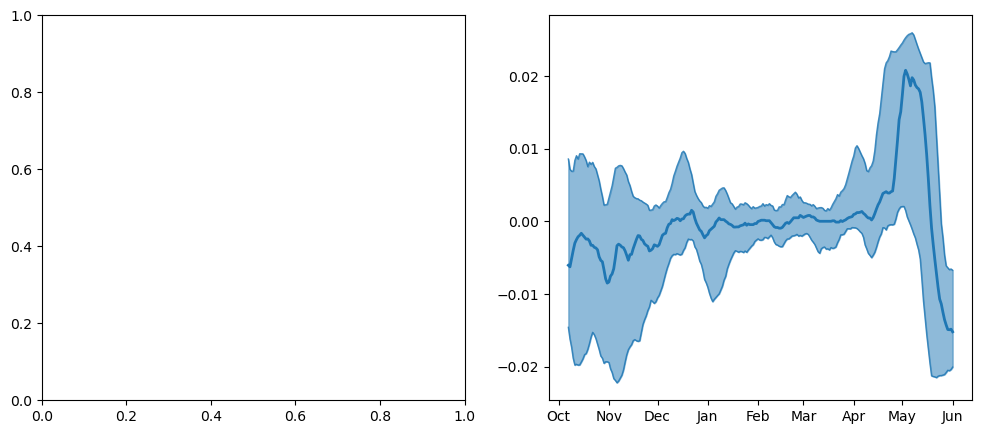

In [65]:
mores_sand = 45.1
mores_clay = 14.4

chena_sand = 31.2
chena_clay = 11.8

mores_6am = mores.loc[mores.index.hour==6]
mores_6pm = mores.loc[mores.index.hour==18]
mores_6am['soil_error'] = calc_soil_moisture_error(mores_sand, mores_clay, mores_6am['sm_2cm']/100)
mores_6pm['soil_error'] = calc_soil_moisture_error(mores_sand, mores_clay, mores_6pm['sm_2cm']/100)

chena_6am = chena.loc[chena.index.hour==6]
chena_6pm = chena.loc[chena.index.hour==18]
chena_6am['soil_error'] = calc_soil_moisture_error(chena_sand, chena_clay, chena_6am['sm_2cm']/100)
chena_6pm['soil_error'] = calc_soil_moisture_error(chena_sand, chena_clay, chena_6pm['sm_2cm']/100)



fig, ax = plt.subplots(1, 2, figsize=(12,5))
gb = chena_6am.loc[chena['dowy']<=244].groupby('dowy')
ax[1].fill_between(gb.quantile(0.1)['soil_error'].index, chena_6am.loc[chena['dowy']<=244].groupby('dowy').quantile(0.1)['soil_error'].rolling(7).mean(), chena_6am.loc[chena['dowy']<=244].groupby('dowy').quantile(0.9)['soil_error'].rolling(7).mean(), alpha=0.5, color=plt.get_cmap('tab10')(0))
ax[1].plot(gb.median()['soil_error'].rolling(7).mean(), lw=2)
ax[1].plot(gb.quantile(0.1)['soil_error'].rolling(7).mean(), lw=1, alpha=0.8, color=plt.get_cmap('tab10')(0))
ax[1].plot(gb.quantile(0.9)['soil_error'].rolling(7).mean(), lw=1, alpha=0.8, color=plt.get_cmap('tab10')(0))

ax[1].set_xticks([1,1+31,1+31+30,1+31+30+31,1+31+30+31+31,1+31+30+31+31+28,1+31+30+31+31+28+31,1+31+30+31+31+28+31+30,1+31+30+31+31+28+31+30+31])
ax[1].set_xticklabels(['Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun'])


# ax[0].plot(mores_6pm.groupby('dowy').median()['soil_error'])



In [63]:
gb.mean()

,swe,PREC.I-1 (in),PREC.I-2 (in),TOBS.I-1 (degC),SNWD.I-1 (in),sm_2cm,SMS.I-1:-8 (pct),SMS.I-1:-20 (pct),STO.I-1:0 (degC),STO.I-1:-2 (degC),...,SRADV.H-1 (watt),PRES.I-1 (mbar),DIAG.I-1 (unit),DIAG.I-2 (unit),DIAG.I-3 (unit),DIAG.I-4 (unit),DIAG.I-5 (unit),DIAG.I-6 (unit),WaterYear,soil_error
dowy,,,,,,,,,,,,,,,,,,,,,
1,0.144444,0.000000,0.000000,2.280000,2.200000,13.100000,21.760000,29.530000,4.230000,2.090000,...,0.122000,932.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.5,-0.000488
2,0.144444,0.066667,0.054000,2.880000,11.100000,13.040000,21.800000,29.360000,4.330000,2.280000,...,0.118000,932.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.5,-0.003816
3,0.237500,0.155556,0.060000,2.300000,11.300000,12.720000,21.670000,29.350000,4.140000,2.000000,...,0.120000,931.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.5,-0.004262
4,0.255556,0.270000,0.102000,1.950000,2.800000,12.610000,21.570000,29.330000,4.090000,1.850000,...,0.125000,917.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.5,-0.005158
5,0.322222,0.290000,0.205000,1.980000,2.400000,12.090000,21.800000,29.400000,3.940000,1.700000,...,0.131000,910.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.5,-0.004729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.037500,22.214286,24.298889,0.255556,0.888889,13.088889,21.600000,29.377778,4.911111,2.688889,...,0.132222,924.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.002462
363,0.000000,22.200000,24.334444,0.377778,0.888889,13.122222,21.522222,29.344444,4.811111,2.544444,...,0.184444,929.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.005424
364,0.025000,22.342857,24.413333,1.077778,0.777778,13.155556,21.611111,29.455556,4.611111,2.433333,...,0.107778,933.0,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,0.004386
